<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_18_Matplotlib Box Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Data Scientist Hourly Salary Box Plot (2.18.1)

Text(0, 0.5, 'Hourly Salary($USD)')

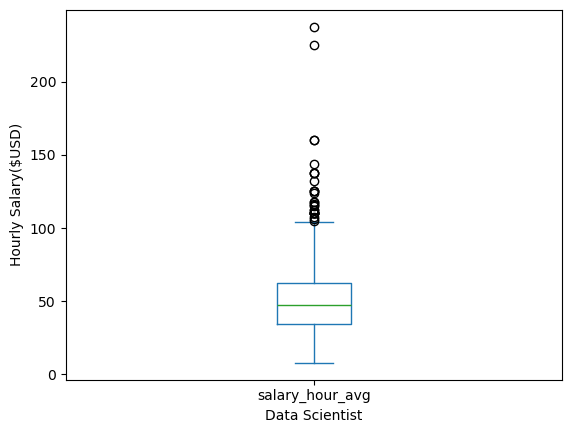

In [7]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_hour_avg'])

df_DS_US['salary_hour_avg'].plot(
    kind='box'
)

plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary($USD)')

---

## 🟨 Comparison of Hourly Salaries for Data Analyst (2.18.2)

C:\Users\User\AppData\Local\Temp\ipykernel_8204\40013037.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(salary_data, labels=countries)


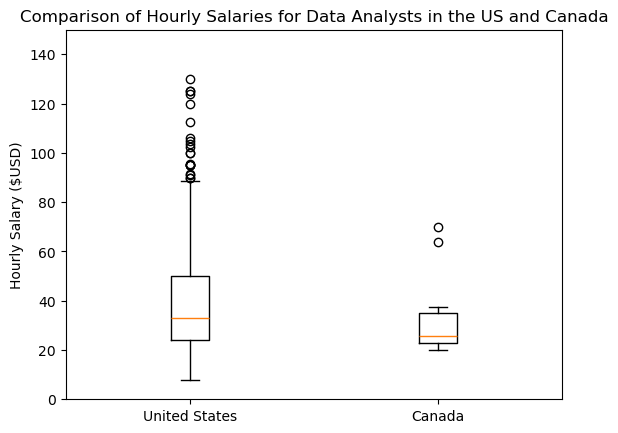

In [14]:
# Code Needed
countries = ['United States', 'Canada']

df_DA = df[
    (df['job_title_short'] == 'Data Analyst') & 
    (df['job_country'].isin(countries))
].dropna(subset=['salary_hour_avg']).copy()

# Step 3: Create a list of salary data for each country using list comprehension
salary_data = [df_DA[df_DA['job_country'] == country]['salary_hour_avg'] for country in countries]

plt.boxplot(salary_data, labels=countries)
plt.xlabel('')
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0, 150)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()


---

## 🟥 Comparison of Hourly Salaries in Germany (2.18.3)

C:\Users\User\AppData\Local\Temp\ipykernel_8204\3720809919.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(salary_lists, labels=job_titles)


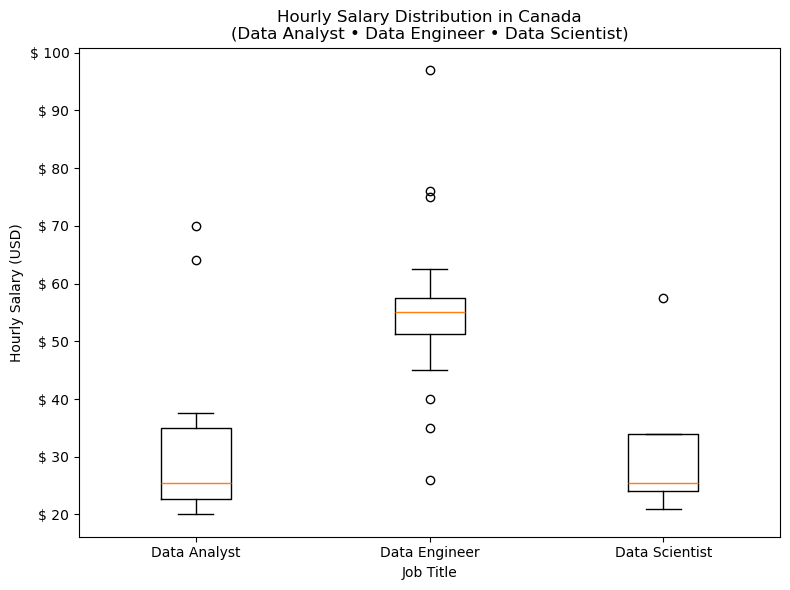

In [17]:
# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_CA = df[
    (df['job_title_short'].isin(job_titles)) &
    (df['job_country'] == 'Canada')
].dropna(subset=['salary_hour_avg']).copy()

salary_lists = [
    df_CA[df_CA['job_title_short'] == jt]['salary_hour_avg']
    for jt in job_titles
]

# 3 – Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(salary_lists, labels=job_titles)

# 4 – Axis cosmetics
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary (USD)')

# -- add a “$” in front of every tick label
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'$ {x:,.0f}'))

plt.title('Hourly Salary Distribution in Canada\n(Data Analyst • Data Engineer • Data Scientist)')
plt.tight_layout()
plt.show()

---